<a href="https://colab.research.google.com/github/dcovarru/investmentsPython/blob/master/Investments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generation of Investment Data with Python
## Author: Daniel Covarrubias

In [ ]:
########################
#
# 1) Identify Symbols form API dumbstock
# 2) Pull daily Price Data for last 365 days via Yahoo
# 3) Identify Metric(s)
# 4) Identify correlations/significance
# 5) Build Historical Model on Training Set
# 6) Test Model on recent data
# 7) Use TF or sklearn
# 8) Build App on AWS or GCP to monitor realtime data
#
########################

In [ ]:
########################
# Load packages 
########################

import pandas as pd
import datetime
import numpy as np
import pandas_datareader
import pandas_datareader.data as web
from pandas_datareader.data import get_quote_yahoo
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix
import os
import re
import plotly.figure_factory as ff
import plotly as py
import plotly.offline as offline
import plotly.graph_objects as go
import plotly.express as px
from google.colab import drive
import io

import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
########################
# Get Ticker Data 
########################

investData = pd.read_csv('https://dumbstockapi.com/stock?format=csv&countries=US')

In [ ]:
# pd.DataFrame(investData).shape
##investData.shape
## investDataSubset = investData.ticker.loc[33:100]
# list(investDataSubset)
## investDataSubsetDF = pd.DataFrame(investDataSubset)
# str(investDataSubset.loc[0])
## investDataSubsetDF.columns.str.strip()
# investDataSubsetDF
investData = investData[investData.exchange == 'NYSE']

In [ ]:
investData['exchange'].value_counts()

NYSE    3127
Name: exchange, dtype: int64

In [ ]:
investData[investData.exchange == 'NYSE']

,ticker,name,is_etf,exchange
0,A,"Agilent Technologies, Inc.",NaN,NYSE
1,AA,Alcoa Corporation,NaN,NYSE
3,AAC,"AAC Holdings, Inc.",NaN,NYSE
7,AAN,"Aaron&#39;s, Inc.",NaN,NYSE
10,AAP,Advance Auto Parts Inc,NaN,NYSE
...,...,...,...,...
6964,ZTO,ZTO Express (Cayman) Inc.,NaN,NYSE
6965,ZTR,Virtus Global Dividend & Income Fund Inc.,NaN,NYSE
6966,ZTS,Zoetis Inc.,NaN,NYSE
6968,ZUO,"Zuora, Inc.",NaN,NYSE


In [ ]:
######################################
# Python program to check if a string contains
# any special characters or not
# import required package
######################################

import re 
  
# Function checks if the input string(test)
# contains any special character or not
def check_splcharacter(test): 
  
    # Make an RE character set and pass  
    # this as an argument in compile function
 
    string_check= re.compile('[@_!#$%^&*()<>?/\|}{~:]') 
      
    # Pass the string in search function  
    # of RE object (string_check).
    # print(test.ticker) 
    # NOTE: the below code relies on extracting text from the ticker attribute
    if(string_check.search(test.ticker) == None): 
        #print(str(test))
        return("noSC")
          
    else:
        #print(str(test)) 
        return("SC") 


In [ ]:
investData['SCFlag'] = investData.apply(check_splcharacter, axis = 1)
# investDataSubsetDF.apply(check_splcharacter, axis = 1)
## check_splcharacter(investDataSubset[33])
## investData[investData.SCFlag == 'noSC'].shape
investData = investData[investData.SCFlag == 'noSC']

In [ ]:
investData

,ticker,name,is_etf,exchange,SCFlag
0,A,"Agilent Technologies, Inc.",NaN,NYSE,noSC
1,AA,Alcoa Corporation,NaN,NYSE,noSC
3,AAC,"AAC Holdings, Inc.",NaN,NYSE,noSC
7,AAN,"Aaron&#39;s, Inc.",NaN,NYSE,noSC
10,AAP,Advance Auto Parts Inc,NaN,NYSE,noSC
...,...,...,...,...,...
6964,ZTO,ZTO Express (Cayman) Inc.,NaN,NYSE,noSC
6965,ZTR,Virtus Global Dividend & Income Fund Inc.,NaN,NYSE,noSC
6966,ZTS,Zoetis Inc.,NaN,NYSE,noSC
6968,ZUO,"Zuora, Inc.",NaN,NYSE,noSC


In [ ]:
######################################
# need to address instances where ticker does not exist 
######################################

# get_data_yahoo() now treats 'null' strings as missing values (GH342)

# start = datetime.datetime(2020, 1, 1)
# end = datetime.datetime(2020, 5, 30)

def get_data(ticker):
    try:
        df = pd.DataFrame()
        # df = pandas_datareader.data.DataReader('%s' % (ticker), 'morningstar', start, end, retry_count=0)
        # df = web.get_quote_av(ticker, api_key = os.getenv('ALPHAVANTAGE_API_KEY'))
        ## df = get_quote_yahoo(ticker)
        df = web.get_data_yahoo(ticker, start="2020-01-01")
        df = df.assign(Stock = ticker)
        # print(df)
    except:
        pass
        
    return df

# get_data('TSLA') #valid Symbol
# get_data('yyfy') #not a valid Symbol
## get_data('A11s1APL') #valid Symbol
# get_data('QQQQ') #not a valid Symbol

In [ ]:
get_data('AGRX')
#valid Symbol

,High,Low,Open,Close,Volume,Adj Close,Stock
Date,,,,,,,
2020-01-02,3.00,2.50,2.56,2.97,6742800,2.97,AGRX
2020-01-03,2.94,2.75,2.83,2.90,2271900,2.90,AGRX
2020-01-06,3.12,2.81,2.87,2.85,3480700,2.85,AGRX
2020-01-07,2.90,2.74,2.85,2.85,1537100,2.85,AGRX
2020-01-08,2.97,2.80,2.81,2.92,1469100,2.92,AGRX
...,...,...,...,...,...,...,...
2020-05-11,2.95,2.66,2.68,2.85,2675100,2.85,AGRX
2020-05-12,2.93,2.73,2.92,2.75,1926900,2.75,AGRX
2020-05-13,2.89,2.56,2.85,2.72,1709300,2.72,AGRX


In [ ]:
# df.index.name = 'newDate'
# outDF3.reset_index(inplace=True)
# outDF3

In [ ]:
## get_quote_yahoo('ZOM')
# investData.ticker[0:10]
investData.reset_index(inplace=True)
investData.ticker[0:10]

0       A
1      AA
2     AAC
3     AAN
4     AAP
5     AAT
6      AB
7     ABB
8    ABBV
9     ABC
Name: ticker, dtype: object

In [ ]:
investData = investData.head(30)

In [ ]:
#########################
# Get Current Prices
# Note that if a Ticker does not have a price, the FOR LOOP will break due to lack of missing Date/PRICE element
#########################

outDF = []

for x in investData.ticker:  
    # print(get_quote_yahoo(x).price)
    # print(ticker)
    outDF.append(get_data(x))
    # print(x)
    # print(tmp)
    # dfTickerPrice = get_quote_yahoo(x).price
    # calPerChange = (df.Close - df.Open)/df.Open
    # outDF.append(calPerChange)
# return calPerChange
# outDF

In [ ]:
# outDF.remove(outDF[2])
## pd.concat(outDF[1:10])
#for ele in outDF: 
#    if len(ele) == 0: 
#        outDF.remove(ele)
#print(outDF)
outDF

[                 High        Low       Open  ...     Volume  Adj Close  Stock
 Date                                         ...                             
 2020-01-02  86.349998  85.199997  85.900002  ...  1410500.0  85.731819      A
 2020-01-03  85.330002  84.500000  84.669998  ...  1118300.0  84.355324      A
 2020-01-06  84.820000  83.599998  84.000000  ...  1993200.0  84.604691      A
 2020-01-07  85.260002  83.940002  83.959999  ...  1684700.0  84.864029      A
 2020-01-08  86.470001  85.199997  85.959999  ...  1847600.0  85.701897      A
 ...               ...        ...        ...  ...        ...        ...    ...
 2020-05-11  81.989998  79.500000  79.599998  ...  1691600.0  81.269997      A
 2020-05-12  82.300003  79.779999  81.580002  ...  2278900.0  79.849998      A
 2020-05-13  81.930000  79.029999  80.379997  ...  2664900.0  80.160004      A
 2020-05-14  81.660004  78.720001  79.290001  ...  2285900.0  81.639999      A
 2020-05-15  82.830002  81.220001  81.510002  ...  4

In [ ]:
#len(outDF)
#filter(None, outDF)
outDF2 = pd.concat(outDF)
# outDF.remove(outDF[19])

In [ ]:
# df['add'] = df.apply(np.sum, axis = 1)
outDF2.head

<bound method NDFrame.head of                  High        Low       Open  ...     Volume  Adj Close  Stock
Date                                         ...                             
2020-01-02  86.349998  85.199997  85.900002  ...  1410500.0  85.731819      A
2020-01-03  85.330002  84.500000  84.669998  ...  1118300.0  84.355324      A
2020-01-06  84.820000  83.599998  84.000000  ...  1993200.0  84.604691      A
2020-01-07  85.260002  83.940002  83.959999  ...  1684700.0  84.864029      A
2020-01-08  86.470001  85.199997  85.959999  ...  1847600.0  85.701897      A
...               ...        ...        ...  ...        ...        ...    ...
2020-05-11  46.340000  42.810001  45.950001  ...  2222100.0  42.796768    ADS
2020-05-12  45.470001  40.360001  43.400002  ...  1717800.0  40.260002    ADS
2020-05-13  40.080002  36.139999  40.080002  ...  2240700.0  37.060001    ADS
2020-05-14  40.150002  35.130001  35.990002  ...  2271500.0  39.380001    ADS
2020-05-15  39.240002  37.310001  

In [ ]:
outDF2.index.name = 'newDate'
outDF2.reset_index(inplace=True)
outDF2.shape

(2726, 8)

In [ ]:
outDF2

,newDate,High,Low,Open,Close,Volume,Adj Close,Stock
newDate,,,,,,,,
0,2020-01-02,86.349998,85.199997,85.900002,85.949997,1410500.0,85.731819,A
1,2020-01-03,85.330002,84.500000,84.669998,84.570000,1118300.0,84.355324,A
2,2020-01-06,84.820000,83.599998,84.000000,84.820000,1993200.0,84.604691,A
3,2020-01-07,85.260002,83.940002,83.959999,85.080002,1684700.0,84.864029,A
4,2020-01-08,86.470001,85.199997,85.959999,85.919998,1847600.0,85.701897,A
...,...,...,...,...,...,...,...,...
2721,2020-05-11,46.340000,42.810001,45.950001,43.020000,2222100.0,42.796768,ADS
2722,2020-05-12,45.470001,40.360001,43.400002,40.470001,1717800.0,40.260002,ADS
2723,2020-05-13,40.080002,36.139999,40.080002,37.060001,2240700.0,37.060001,ADS


In [ ]:
# outDF2[outDF2.ticker == 'TSLA']

# plt.hist(float(outDF2[outDF2.price < 5]))
###################################
# This used to work
###################################
# fig = px.box(outDF2."price", y="Adj Close", points = "all")
# fig.show()

In [ ]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
outDF2.to_csv('outDF2_small.csv')
!cp outDF2_small.csv "drive/My Drive/"
  # drive.flush_and_unmount()

  # After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
##!ls "/content/drive/My Drive"

In [ ]:
drive.flush_and_unmount()

In [ ]:
##############################################
# connect with StockTwits #
##############################################

# https://api.stocktwits.com/api/2/streams/symbol/A.json

# import json

# with open('https://api.stocktwits.com/api/2/streams/symbol/A.json') as f:
#   data = json.load(f)

# person_dict = {'name': 'Bob',
# 'age': 12,
# 'children': None
# }
# person_json = json.dumps(person_dict)

# Output: {"name": "Bob", "age": 12, "children": null}
# print(person_json)

import urllib, json, urllib.request

#url = "https://api.stocktwits.com/api/2/streams/symbol/A.json"

#response = urllib.request.urlopen(url)
#data = json.loads(response.read())
# print data

In [ ]:
##############################################
# read in historical data previously created #
##############################################
drive.mount('/content/drive')
outDF2 = pd.read_csv("drive/My Drive/outDF2.csv", index_col=0)
# df=pd.read_csv('gdrive/My Drive/data.csv')
# Preview the first 5 lines of the loaded data 
# drive.flush_and_unmount()
drive.flush_and_unmount()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Below code is framework to pull historical data
outDF2.iloc[:,0:3]
# outDF2.loc['AAL']
outDF2

,ask,askSize,averageDailyVolume10Day,averageDailyVolume3Month,bid,bidSize,bookValue,currency,dividendDate,earningsTimestamp,earningsTimestampEnd,earningsTimestampStart,epsForward,epsTrailingTwelveMonths,esgPopulated,exchange,exchangeDataDelayedBy,exchangeTimezoneName,exchangeTimezoneShortName,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,fiftyTwoWeekHigh,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,financialCurrency,firstTradeDateMilliseconds,forwardPE,fullExchangeName,gmtOffSetMilliseconds,language,longName,market,marketCap,marketState,messageBoardId,openInterest,postMarketChange,postMarketChangePercent,postMarketPrice,postMarketTime,price,priceHint,priceToBook,quoteSourceName,quoteType,region,regularMarketChange,regularMarketChangePercent,regularMarketDayHigh,regularMarketDayLow,regularMarketDayRange,regularMarketOpen,regularMarketPreviousClose,regularMarketPrice,regularMarketTime,regularMarketVolume,sharesOutstanding,shortName,sourceInterval,tradeable,trailingAnnualDividendRate,trailingAnnualDividendYield,trailingPE,trailingThreeMonthNavReturns,trailingThreeMonthReturns,triggerable,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,underlyingSymbol,ytdReturn
AABA,0.000,40.0,0.0,0.0,0.000,451.0,74.154,USD,NaN,1.566576e+09,1.583174e+09,1.582655e+09,0.51,-8.095,False,NMS,0,America/New_York,EST,19.630000,0.000000,0.000000,79.18,-59.550003,-0.752084,19.250,0.379999,0.019740,19.25 - 79.18,USD,8.292960e+11,38.490196,NasdaqGS,-18000000,en-US,Altaba Inc.,us_market,1.019800e+10,CLOSED,finmb_91800,NaN,NaN,NaN,NaN,NaN,19.6300,2,0.264719,Nasdaq Real Time Price,EQUITY,US,0.000000,0.000000,19.680,19.4100,19.41 - 19.68,19.560,19.6300,19.6300,1570046401,45460037.0,519511008.0,Altaba Inc.,15,True,NaN,NaN,NaN,NaN,NaN,True,56.864258,-37.234260,-0.654792,NaN,NaN
AAL,29.200,14.0,8949037.0,8141411.0,29.190,292.0,-0.272,USD,1.582070e+09,1.579783e+09,1.588091e+09,1.587746e+09,5.81,3.790,False,NMS,0,America/New_York,EST,28.059706,1.140295,0.040638,36.73,-7.529999,-0.205009,24.230,4.970001,0.205118,24.23 - 36.73,USD,1.127808e+12,5.025818,NasdaqGS,-18000000,en-US,American Airlines Group Inc.,us_market,1.250344e+10,CLOSED,finmb_168569,NaN,0.019999,0.068488,29.22,1.581724e+09,29.2000,2,-107.352936,Delayed Quote,EQUITY,US,-0.889999,-2.957791,30.270,29.1400,29.14 - 30.27,30.010,30.0900,29.2000,1581714001,5524788.0,428200000.0,"American Airlines Group, Inc.",15,True,0.40,0.013293,7.704486,NaN,NaN,True,28.117842,1.082159,0.038487,NaN,NaN
AAME,4.140,8.0,2437.0,4038.0,1.980,22.0,5.682,USD,1.556064e+09,1.573574e+09,1.573574e+09,1.573574e+09,NaN,-0.092,False,NGM,0,America/New_York,EST,1.999412,0.290588,0.145337,2.95,-0.660000,-0.223729,1.460,0.830000,0.568493,1.46 - 2.95,USD,3.221316e+11,NaN,NasdaqGM,-18000000,en-US,Atlantic American Corporation,us_market,4.689806e+07,CLOSED,finmb_252124,NaN,NaN,NaN,NaN,NaN,2.2900,4,0.403027,NaN,EQUITY,US,0.000000,0.000000,2.380,2.2900,2.29 - 2.38,2.010,2.2900,2.2900,1581714001,84.0,20479500.0,Atlantic American Corporation,15,True,0.02,0.008734,NaN,NaN,NaN,True,2.212518,0.077482,0.035020,NaN,NaN
AAOI,12.340,9.0,768325.0,681683.0,11.870,22.0,15.068,USD,NaN,1.582855e+09,1.582855e+09,1.582855e+09,-0.53,-1.974,False,NGM,0,America/New_York,EST,12.661912,-0.761912,-0.060174,17.05,-5.150000,-0.302053,8.340,3.560000,0.426858,8.34 - 17.05,USD,1.380182e+12,-22.452831,NasdaqGM,-18000000,en-US,"Applied Optoelectronics, Inc.",us_market,2.394304e+08,CLOSED,finmb_1043391,NaN,0.000000,0.000000,11.90,1.581716e+09,11.9000,2,0.789753,Nasdaq Real Time Price,EQUITY,US,-0.850000,-6.666670,12.700,11.8141,11.8141 - 12.7,12.700,12.7500,11.9000,1581714001,999736.0,20120200.0,"Applied Optoelectronics, Inc.",15,True,NaN,NaN,NaN,NaN,NaN,True,10.968849,0.931150,0.084890,NaN,NaN
AAON,57.120,9.0,111362.0,138753.0,48.750,9.0,5.364,USD,1.576627e+09,1.572553e+09,1.572553e+09,1.572553e+09,1.32,0.960,False,NMS,0,America/N

In [ ]:
outDF2.index.name = 'ticker'
outDF2.reset_index(inplace=True)
outDF2

,ticker,ask,askSize,averageDailyVolume10Day,averageDailyVolume3Month,bid,bidSize,bookValue,currency,dividendDate,earningsTimestamp,earningsTimestampEnd,earningsTimestampStart,epsForward,epsTrailingTwelveMonths,esgPopulated,exchange,exchangeDataDelayedBy,exchangeTimezoneName,exchangeTimezoneShortName,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,fiftyTwoWeekHigh,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,financialCurrency,firstTradeDateMilliseconds,forwardPE,fullExchangeName,gmtOffSetMilliseconds,language,longName,market,marketCap,marketState,messageBoardId,openInterest,postMarketChange,postMarketChangePercent,postMarketPrice,postMarketTime,price,priceHint,priceToBook,quoteSourceName,quoteType,region,regularMarketChange,regularMarketChangePercent,regularMarketDayHigh,regularMarketDayLow,regularMarketDayRange,regularMarketOpen,regularMarketPreviousClose,regularMarketPrice,regularMarketTime,regularMarketVolume,sharesOutstanding,shortName,sourceInterval,tradeable,trailingAnnualDividendRate,trailingAnnualDividendYield,trailingPE,trailingThreeMonthNavReturns,trailingThreeMonthReturns,triggerable,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,underlyingSymbol,ytdReturn
0,AABA,0.000,40.0,0.0,0.0,0.000,451.0,74.154,USD,NaN,1.566576e+09,1.583174e+09,1.582655e+09,0.51,-8.095,False,NMS,0,America/New_York,EST,19.630000,0.000000,0.000000,79.18,-59.550003,-0.752084,19.250,0.379999,0.019740,19.25 - 79.18,USD,8.292960e+11,38.490196,NasdaqGS,-18000000,en-US,Altaba Inc.,us_market,1.019800e+10,CLOSED,finmb_91800,NaN,NaN,NaN,NaN,NaN,19.6300,2,0.264719,Nasdaq Real Time Price,EQUITY,US,0.000000,0.000000,19.680,19.4100,19.41 - 19.68,19.560,19.6300,19.6300,1570046401,45460037.0,519511008.0,Altaba Inc.,15,True,NaN,NaN,NaN,NaN,NaN,True,56.864258,-37.234260,-0.654792,NaN,NaN
1,AAL,29.200,14.0,8949037.0,8141411.0,29.190,292.0,-0.272,USD,1.582070e+09,1.579783e+09,1.588091e+09,1.587746e+09,5.81,3.790,False,NMS,0,America/New_York,EST,28.059706,1.140295,0.040638,36.73,-7.529999,-0.205009,24.230,4.970001,0.205118,24.23 - 36.73,USD,1.127808e+12,5.025818,NasdaqGS,-18000000,en-US,American Airlines Group Inc.,us_market,1.250344e+10,CLOSED,finmb_168569,NaN,0.019999,0.068488,29.22,1.581724e+09,29.2000,2,-107.352936,Delayed Quote,EQUITY,US,-0.889999,-2.957791,30.270,29.1400,29.14 - 30.27,30.010,30.0900,29.2000,1581714001,5524788.0,428200000.0,"American Airlines Group, Inc.",15,True,0.40,0.013293,7.704486,NaN,NaN,True,28.117842,1.082159,0.038487,NaN,NaN
2,AAME,4.140,8.0,2437.0,4038.0,1.980,22.0,5.682,USD,1.556064e+09,1.573574e+09,1.573574e+09,1.573574e+09,NaN,-0.092,False,NGM,0,America/New_York,EST,1.999412,0.290588,0.145337,2.95,-0.660000,-0.223729,1.460,0.830000,0.568493,1.46 - 2.95,USD,3.221316e+11,NaN,NasdaqGM,-18000000,en-US,Atlantic American Corporation,us_market,4.689806e+07,CLOSED,finmb_252124,NaN,NaN,NaN,NaN,NaN,2.2900,4,0.403027,NaN,EQUITY,US,0.000000,0.000000,2.380,2.2900,2.29 - 2.38,2.010,2.2900,2.2900,1581714001,84.0,20479500.0,Atlantic American Corporation,15,True,0.02,0.008734,NaN,NaN,NaN,True,2.212518,0.077482,0.035020,NaN,NaN
3,AAOI,12.340,9.0,768325.0,681683.0,11.870,22.0,15.068,USD,NaN,1.582855e+09,1.582855e+09,1.582855e+09,-0.53,-1.974,False,NGM,0,America/New_York,EST,12.661912,-0.761912,-0.060174,17.05,-5.150000,-0.302053,8.340,3.560000,0.426858,8.34 - 17.05,USD,1.380182e+12,-22.452831,NasdaqGM,-18000000,en-US,"Applied Optoelectronics, Inc.",us_market,2.394304e+08,CLOSED,finmb_1043391,NaN,0.000000,0.000000,11.90,1.581716e+09,11.9000,2,0.789753,Nasdaq Real Time Price,EQUITY,US,-0.850000,-6.666670,12.700,11.8141,11.8141 - 12.7,12.700,12.7500,11.9000,1581714001,999736.0,20120200.0,"Applied Optoelectronics, Inc.",15,True,NaN,NaN,NaN,NaN,NaN,True,10.968849,0.931150,0.084890,NaN,NaN
4,AAON,57.120,9.0,111362.0,138753.0,48.750,9.0,5.364,USD,1.576627e+09,1.572553e+09,1.572553e+09,1.572553e+09,1.32,0.960,Fals

In [ ]:
outDF2.set_index("ticker", inplace=True)  

In [ ]:
## outDF2.loc[['AABA', 'ZYNE']]
pd.DataFrame(outDF2.columns)
# extract only Float64 items 
pd.DataFrame(outDF2.dtypes)=='float64'

outDF3 = outDF2[(outDF2.dtypes=='float64').index[outDF2.dtypes=='float64']]

In [ ]:
### Write out column names ###
### DO NOT RUN UNLESS YOU NEED TO CREATE COLUMNS ###
outDF2_Columns = pd.DataFrame(outDF2.columns)

drive.mount('/content/drive')
outDF2_Columns.to_csv('outDF2_Columns.csv')
!cp outDF2_Columns.csv "drive/My Drive/"
drive.flush_and_unmount()

In [ ]:
# outDF2.dtypes
outDF3.loc['AABA'].shape

(50,)

In [ ]:
#############################################
## Add some TensorFlow or Pytorch Analysis ##
#############################################

plt.figure(figsize=(10,5)
sns.heatmap(outDF3.corr())

SyntaxError: ignored

In [ ]:
## 02/05/2020

#ALPHAVANTAGE_API_KEY = 'ANBKAAOU9YDNYBRV'
#keyValue = os.getenv(ALPHAVANTAGE_API_KEY)
## os.environ['ALPHAVANTAGE_API_KEY'] = 'ANBKAAOU9YDNYBRV'
### get_quote_yahoo('AGRX').price
### get_quote_yahoo('WORK').price
#pd.concat('WORK', web.DataReader('WORK', 'yahoo', '2019-10-01'))
outDF3 = web.DataReader('TSLA', 'yahoo', '2019-06-01')
outDF3 = outDF3.assign(Stock = 'TSLA')
outDF3
# len(get_quote_yahoo(investData.ticker[3]))
## web.get_quote_av(["AAPL"], api_key = os.getenv('ALPHAVANTAGE_API_KEY'))
## web.get_quote_av(["AAPL", "TSLA"])
# os.getcwd()
## os.getenv('ALPHAVANTAGE_API_KEY')
## web.get_sector_performance_av()
# alphaVantage API Key: ANBKAAOU9YDNYBRV
## investDataSubsetDF_clean =  investDataSubsetDF[investDataSubsetDF['SCFlag'] == 'noSC']
## web.DataReader('gs', 'iex-tops')
## web.get_quote_av(["AAPL", "TSLA"])

,High,Low,Open,Close,Volume,Adj Close,Stock
Date,,,,,,,
2019-06-03,186.679993,176.990005,185.509995,178.970001,13064400,178.970001,TSLA
2019-06-04,193.979996,179.610001,181.100006,193.600006,13807500,193.600006,TSLA
2019-06-05,201.279999,191.850006,198.679993,196.589996,13510800,196.589996,TSLA
2019-06-06,211.000000,201.800003,204.440002,205.949997,20242200,205.949997,TSLA
2019-06-07,210.839996,203.500000,205.000000,204.500000,16003500,204.500000,TSLA
...,...,...,...,...,...,...,...
2020-02-10,819.989990,752.400024,800.000000,771.280029,24689200,771.280029,TSLA
2020-02-11,783.510010,758.000000,768.789978,774.380005,11697500,774.380005,TSLA
2020-02-12,789.750000,763.369995,777.869995,767.289978,12022500,767.289978,TSLA


In [ ]:
outDF3.index.name = 'newDate'
outDF3.reset_index(inplace=True)
outDF3

,newDate,High,Low,Open,Close,Volume,Adj Close,Stock
0,2019-06-03,186.679993,176.990005,185.509995,178.970001,13064400,178.970001,TSLA
1,2019-06-04,193.979996,179.610001,181.100006,193.600006,13807500,193.600006,TSLA
2,2019-06-05,201.279999,191.850006,198.679993,196.589996,13510800,196.589996,TSLA
3,2019-06-06,211.000000,201.800003,204.440002,205.949997,20242200,205.949997,TSLA
4,2019-06-07,210.839996,203.500000,205.000000,204.500000,16003500,204.500000,TSLA
...,...,...,...,...,...,...,...,...
174,2020-02-10,819.989990,752.400024,800.000000,771.280029,24689200,771.280029,TSLA
175,2020-02-11,783.510010,758.000000,768.789978,774.380005,11697500,774.380005,TSLA
176,2020-02-12,789.750000,763.369995,777.869995,767.289978,12022500,767.289978,TSLA
177,2020-02-13,818.000000,735.000000,741.840027,804.000000,26289300,804.000000,TSLA


In [ ]:
fig = px.line(outDF2[outDF2.Stock == 'A'], x='newDate', y='High')
fig.show()

In [ ]:
investDataSubsetDF_clean['ticker'].iloc[13]

'ACCP'

In [ ]:
###################################
# Need code to extract tickers with recent data
# and extract tickers with SPECIAL CHARACTERS
# Data as of Today() - 1
###################################

dataMostRecent = []
# dataMostRecent = web.get_quote_av(list(investDataSubsetDF_clean['ticker'][14:20]), api_key = os.getenv('ALPHAVANTAGE_API_KEY'))
dataMostRecent

[]

In [ ]:
# df['add'] = df.apply(np.sum, axis = 1)

In [ ]:
outDF

,language,region,quoteType,triggerable,quoteSourceName,currency,firstTradeDateMilliseconds,priceHint,postMarketChangePercent,postMarketTime,postMarketPrice,postMarketChange,regularMarketChange,regularMarketChangePercent,regularMarketTime,regularMarketPrice,regularMarketDayHigh,regularMarketDayRange,regularMarketDayLow,regularMarketVolume,regularMarketPreviousClose,bid,ask,bidSize,askSize,fullExchangeName,financialCurrency,regularMarketOpen,averageDailyVolume3Month,averageDailyVolume10Day,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,dividendDate,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,trailingAnnualDividendRate,trailingPE,trailingAnnualDividendYield,marketState,epsTrailingTwelveMonths,epsForward,sharesOutstanding,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,marketCap,forwardPE,priceToBook,sourceInterval,exchangeDataDelayedBy,tradeable,exchange,shortName,longName,messageBoardId,exchangeTimezoneName,exchangeTimezoneShortName,gmtOffSetMilliseconds,market,esgPopulated,price
A,en-US,US,EQUITY,True,Delayed Quote,USD,942915600000,2,0.0,1579298684,90.12,0.0,0.660004,0.737764,1579295048,90.12,90.28,89.205 - 90.28,89.205,3718336,89.46,88.87,89.98,12,14,NYSE,USD,89.97,1613106,1944500,24.770004,0.379036,65.35 - 90.28,-0.159996,-0.001772,65.35,90.28,1579651200,1582059600,1582059600,1582059600,0.656,26.741842,0.007333,CLOSED,3.37,3.8,309000000,15.362,84.83727,5.28273,0.062269,76.43817,13.681831,0.178992,27953692672,23.71579,5.866424,15,0,True,NYQ,"Agilent Technologies, Inc.","Agilent Technologies, Inc.",finmb_154924,America/New_York,EST,-18000000,us_market,False,90.12


In [ ]:
#########################
# Extract Single Ticker
#########################

investData.loc[investData.ticker == 'IBIO']
myTicker = investData.loc[investData.ticker == 'IBIO'].ticker
myTicker

3164    IBIO
Name: ticker, dtype: object

In [ ]:
#########################
# Create Array with Tickers
# Run from here
#########################

myTickers = ['AGRX', 'SPCE', 'WORK', 'CETX', 'TSLA']
myTickers

myTicker = ['AGRX']

In [ ]:
#########################
# Extract Single Series
#########################

start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 1, 11)

#########################
# here arbirtraty ticker input
# note that excluding "end" will extract current data
#########################

df = web.DataReader(myTicker, 'yahoo', start)
# df.describe()

In [ ]:
#########################
# Extract Multiple Series
#########################

outDF = []

for i in myTickers:  
    df = web.DataReader(myTickers, 'yahoo', start)
    calPerChange = (df.Close - df.Open)/df.Open
    # outDF.append(calPerChange)
# return calPerChange
# outDF

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9bb94cb00>,
      dtype=object)

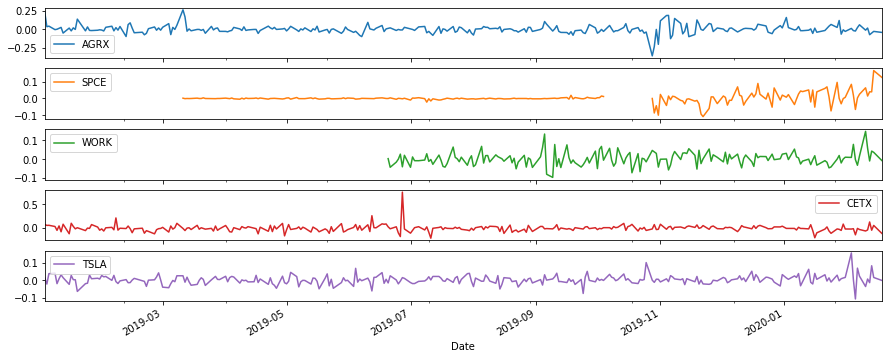

In [ ]:
# calPerChange = []
calPerChange.head()
calPerChange.plot(subplots=True, figsize=(15,6))

In [ ]:
corr = calPerChange.corr()
corr

Symbols,AGRX,SPCE,WORK,CETX,TSLA
Symbols,,,,,
AGRX,1.000000,0.070598,0.023858,0.059532,0.036939
SPCE,0.070598,1.000000,0.063959,0.020090,0.231177
WORK,0.023858,0.063959,1.000000,-0.053147,0.012853
CETX,0.059532,0.020090,-0.053147,1.000000,0.086999
TSLA,0.036939,0.231177,0.012853,0.086999,1.000000


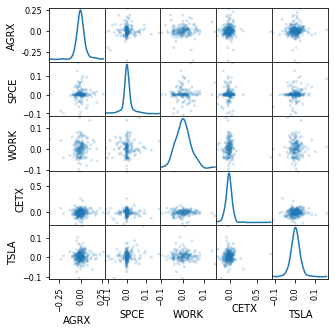

In [ ]:
scatter_matrix(calPerChange, diagonal='kde', alpha=0.2, figsize=(5, 5));

Text(0, 0.5, 'Returns SRRA')

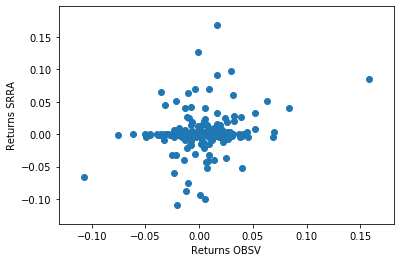

In [ ]:
plt.scatter(calPerChange.TSLA, calPerChange.SPCE)
plt.xlabel('Returns OBSV')
plt.ylabel('Returns SRRA')

Text(0, 0.5, 'Returns IBIO')

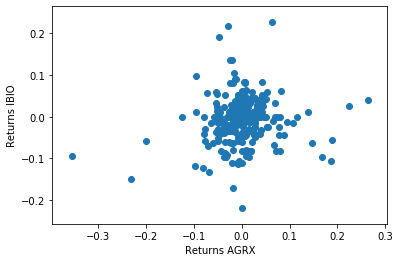

In [ ]:
#########################
# One outlier, remove
#########################

calPerChange2 = calPerChange[calPerChange.IBIO < 1]

plt.scatter(calPerChange2.AGRX, calPerChange2.IBIO)
plt.xlabel('Returns AGRX')
plt.ylabel('Returns IBIO')

In [ ]:
#########################
# some calculated values 
#########################

# calPerChange = (outDF.Close - outDF.Open)/outDF.Open
# calPerChange
# calPerChange = calPerChange.rename(columns={"IBIO": "PerChange"})
# list(outDF.columns) 

In [ ]:
# calPerChange.pivot_table(index='Date',columns='Stock',values='PerChange',aggfunc='sum').plot()

In [ ]:
#########################
# some calculated values 
#########################

close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.head()

Symbols,IBIO
Date,
2018-01-02,NaN
2018-01-03,NaN
2018-01-04,NaN
2018-01-05,NaN
2018-01-08,NaN


In [ ]:
#########################
# join DF's 
#########################

dfMerge = df.merge(calPerChange, left_on = 'Date', right_on = 'Date')
# list(dfMerge.columns)
dfMerge.tail()

,"(Adj Close, IBIO)","(Close, IBIO)","(High, IBIO)","(Low, IBIO)","(Open, IBIO)","(Volume, IBIO)",PerChange
Date,,,,,,,
2019-12-23,0.250,0.250,0.2700,0.2300,0.25,6314800.0,0.000000
2019-12-24,0.240,0.240,0.2500,0.2300,0.25,1628200.0,-0.040000
2019-12-26,0.230,0.230,0.2400,0.2200,0.23,2195500.0,0.000000
2019-12-27,0.230,0.230,0.2400,0.2200,0.23,2795500.0,0.000000
2019-12-30,0.253,0.253,0.2625,0.2301,0.24,5165363.0,0.054167


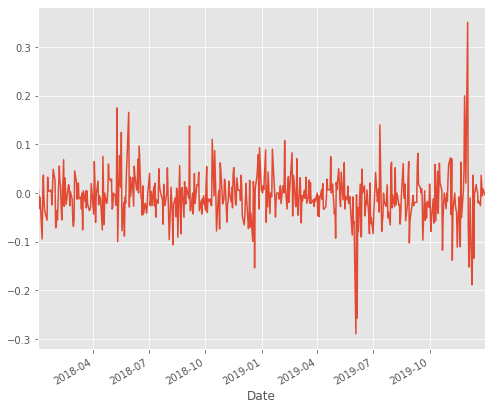

In [ ]:
#########################
# create Chart
# with Chart formatting
#########################

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

# close_px.plot(label='AGRX')
# mavg.plot(label='Adj Close')
# plt.legend()

dfMerge.PerChange.plot()

In [ ]:
dfMerge.tail()

,"(Adj Close, SRRA)","(Close, SRRA)","(High, SRRA)","(Low, SRRA)","(Open, SRRA)","(Volume, SRRA)",PerChange
Date,,,,,,,
2019-12-23,0.3380,0.3380,0.347,0.3210,0.347,1525800,-0.025937
2019-12-24,0.3420,0.3420,0.344,0.3210,0.330,1177000,0.036364
2019-12-26,0.3400,0.3400,0.344,0.3300,0.342,1040700,-0.005848
2019-12-27,0.3400,0.3400,0.345,0.3310,0.337,1350000,0.008902
2019-12-30,0.3388,0.3388,0.340,0.3253,0.340,1126159,-0.003529
